<a href="https://colab.research.google.com/github/DulanakaNavojith/Optimum-Racing-Battery-Team/blob/main/FS_Battery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import matplotlib.pyplot as plt

# Motor spec
motor_peak_p = 0
motor_cont_p = 0


def motor_peak(rpm, motor_peak_p):
    if motor_peak_p<120:
        peak_grad_l = 60 / 2500  # kW/rpm
        motor_peak_p = peak_grad_l * rpm
    elif motor_peak_p >= 120 and rpm > 5000:
        peak_grad_b = 60 / 2500 - (60 / 2500) * (5 /32500)*(rpm-5000)
        motor_peak_p = peak_grad_b * rpm
        if motor_peak_p == 123 and rpm > 5500:
            motor_peak_p = 123
    return motor_peak_p

def motor_cont(rpm, motor_cont_p):
    if motor_cont_p < 60:
        cont_grad_l = 35 / 3000
        motor_cont_p = cont_grad_l * rpm
    elif motor_cont_p >= 60  and rpm > 5200:
        cont_grad_b = 35 / 3000 - (35 / 3000) * (5 /32500)*(rpm-5200)
        motor_cont_p = cont_grad_b * rpm
        if motor_cont_p == 63 and rpm > 5800:
            motor_cont_p = 63
    return motor_cont_p



#according to the given rpm value, can have furthure variation from there

'''
rpm = 0
rpm_values = []
motor_peak_p_values = []
motor_cont_p_values = []

while rpm <= 6500:
    rpm += 0.1
    #Power varing along the peak curve
    motor_peak_p = motor_peak(rpm, motor_peak_p)

    #Power varing along the cont curve
    motor_cont_p = motor_cont(rpm, motor_cont_p)


    rpm_values.append(rpm)
    motor_peak_p_values.append(motor_peak_p)
    motor_cont_p_values.append(motor_cont_p)
    #print(rpm,' | ',motor_peak_p,' | ',motor_cont_p)

plt.plot(rpm_values, motor_peak_p_values, label='Peak Power')
plt.plot(rpm_values, motor_cont_p_values, label='Continuous Power')
plt.xlabel('RPM')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()
'''

"\nrpm = 0\nrpm_values = []\nmotor_peak_p_values = []\nmotor_cont_p_values = []\n\nwhile rpm <= 6500:\n    rpm += 0.1\n    #Power varing along the peak curve\n    motor_peak_p = motor_peak(rpm, motor_peak_p)\n    \n    #Power varing along the cont curve\n    motor_cont_p = motor_cont(rpm, motor_cont_p)\n\n\n    rpm_values.append(rpm)\n    motor_peak_p_values.append(motor_peak_p)\n    motor_cont_p_values.append(motor_cont_p)\n    #print(rpm,' | ',motor_peak_p,' | ',motor_cont_p)\n\nplt.plot(rpm_values, motor_peak_p_values, label='Peak Power')\nplt.plot(rpm_values, motor_cont_p_values, label='Continuous Power')\nplt.xlabel('RPM')\nplt.ylabel('Power (kW)')\nplt.legend()\nplt.show()\n"

In [155]:
#To fint thelimit rpm value for the given called_p

def peak_limit_rpm (called_p):
    if called_p<120:
        peak_grad_l = 60 / 2500  # kW/rpm
        limit_peak_rpm = called_p/peak_grad_l
        return limit_peak_rpm
    elif called_p >= 120:
        peak_grad_b = 60 / 2500 - (60 / 2500) * (5 /32500)*(rpm-5000)
        limit_peak_rpm = called_p/ peak_grad_l
        if motor_peak_p == 123:
            limit_peak_rpm = 5500
    return limit_peak_rpm


def cont_limit_rpm(called_p):
    global cont_grad_l
    global cont_grad_b
    if called_p < 60:
        cont_grad_l = 35 / 3000
        limit_cont_rpm = called_p / cont_grad_l
    elif called_p >= 60:
        cont_grad_b = 35 / 3000 - (35 / 3000) * (5 /32500)*(rpm-5200)
        limit_cont_rpm = called_p/cont_grad_b
        if called_p == 63:
            limit_cont_rpm = 5800
    return limit_cont_rpm


#Test
#called_p = 28
#print('limit_peak_rpm = ' ,peak_limit_rpm(called_p))
#print('limit_cont_rpm = ' , cont_limit_rpm(called_p))



In [156]:
#Batetry specscdefine at once
class Battery:
    def __init__(self, type_c, cap_c, max_cv, nom_cv, cut_cv, max_ci, weight_c, par_count, ser_count):
        self.type_c = type_c
        self.cap_c = cap_c  # Cell Capacity Ah
        self.max_cv = max_cv  # Max cell voltage
        self.nom_cv = nom_cv  # Nominal Voltage
        self.cut_cv = cut_cv  # Cutoff Voltage
        self.max_ci = max_ci  # Max continuous discharging
        self.weight_c = weight_c  # Weight in Gram
        self.par_count = par_count  # Parallel cells in string
        self.ser_count = ser_count  # Series modules

    def max_min(self):
        max_pv = self.max_cv * self.ser_count
        nom_pv = self.nom_cv * self.ser_count
        cut_pv = self.cut_cv * self.ser_count

        max_pi = (motor_power / cut_pv)*1000 #A
        nom_pi = (motor_power / nom_pv)*1000 #A
        min_pi = (motor_power / max_pv)*1000 #A

        min_time = 60 * self.cap_c / (max_pi / self.par_count)
        nom_time = 60 * self.cap_c / (nom_pi / self.par_count)
        max_time = 60 * self.cap_c / (min_pi / self.par_count)

        return max_pv, nom_pv, cut_pv, max_pi, nom_pi, min_pi, min_time, nom_time, max_time

    def calc(self, var_pi):
        battery_resis = 0.015  # ohm
        var_ci = var_pi / self.par_count
        v_drop = battery_resis * var_ci
        drop_pv = v_drop * (nom_pv / self.nom_cv)
        var_pv = motor_power*1000 / var_pi
        var_pv -= drop_pv
        return var_pv,v_drop,drop_pv


#Test
motor_power = 30
var_pi = 30000/350

#battery = Battery("18650", 2.8, 4.2, 3.6, 2.5, 35, 46, 10, 100)
battery = Battery("21700", 4.5, 4.2, 3.6, 2.5, 45, 70, 8, 96)
max_pv, nom_pv, cut_pv, max_pi, nom_pi, min_pi, min_time, nom_time, max_time = battery.max_min()
var_pv = battery.calc(var_pi)

print("Max Pack Voltage:", max_pv)
print("Nominal Pack Voltage:", nom_pv)
print("Cutoff Pack Voltage:", cut_pv)
print("Max Pack Current:", max_pi)
print("Nominal Pack Current:", nom_pi)
print("Minimum Pack Current:", min_pi)
print("Minimum Travel Time:", min_time)
print("Nominal Travel Time:", nom_time)
print("Maximum Travel Time:", max_time)
print("Cell Voltage Drop:", var_pv[1])
print("Pack Voltage Drop:", var_pv[2])
print("Real Pack Voltage (From Nominal Voltage):", var_pv[0])

Max Pack Voltage: 403.20000000000005
Nominal Pack Voltage: 345.6
Cutoff Pack Voltage: 240.0
Max Pack Current: 125.0
Nominal Pack Current: 86.80555555555556
Minimum Pack Current: 74.40476190476188
Minimum Travel Time: 17.28
Nominal Travel Time: 24.8832
Maximum Travel Time: 29.030400000000007
Cell Voltage Drop: 0.1607142857142857
Pack Voltage Drop: 15.428571428571427
Real Pack Voltage (From Nominal Voltage): 334.57142857142856


In [158]:
#Motor Specs (Motor maximum power we are planning to achieve)
max_motor_power = 70
throt_reso = 100


In [159]:
#Define the throttle map with time
def throt_map():
  throt_posi = 40 #throttle position 0-100
  delta_t = 10  #delta time is 1 mili sec
  return throt_posi,delta_t

In [160]:
#motor power varing method with the accelerations
def throt_grad(max_motor_power,throt_reso):
  #deliver power of the motor with 0-1 throttle posissioning
  throt_grad_ =  float(max_motor_power/throt_reso)
  return throt_grad_

#Test
throt_grad(max_motor_power,throt_reso)

0.7

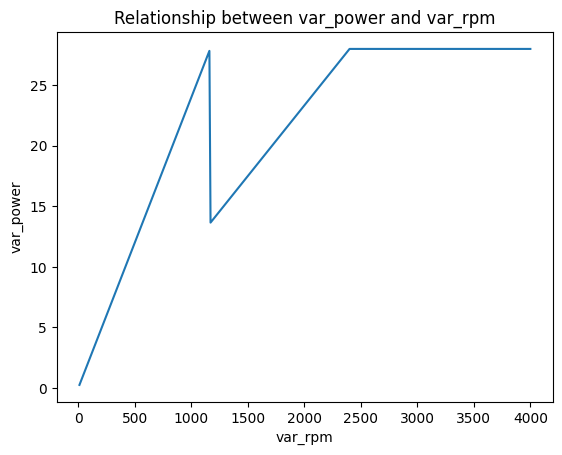

In [181]:
import matplotlib.pyplot as plt

#Check 1
global var_rpm

def called_power(throt_grad_,throt_posi,delta_t,var_rpm):
  called_p = throt_grad_ * throt_posi #called rated power with the prottle position
  grad_acc = called_p / delta_t  #delta_t(s) is returned from the throt_map()
  return called_p, grad_acc


def vary(grad_acc,var_rpm,called_p):
  if grad_acc > 1:
    if var_rpm < peak_limit_rpm(called_p):
      var_power = motor_peak(var_rpm,motor_peak_p)
      return var_power

    elif var_rpm < cont_limit_rpm(called_p):  #peak to continuous: motor reached to the called_power limit, then the power goes down to the continous and going along
      #according to the current rpm, power will rapidly drop to the level of continous power curve
      var_power = motor_cont(var_rpm,motor_cont_p)
      return var_power

    elif var_rpm >= cont_limit_rpm(called_p):
      var_power = motor_cont(cont_limit_rpm(called_p),motor_cont_p)
      return var_power

  elif grad_acc < 1:
    var_power = motor_cont(var_rpm,motor_cont_p)
    return var_power


# Initialize lists to store the data points
var_rpm_values = []
var_power_values = []

#Test
var_rpm =0
while var_rpm < 4000:
  var_rpm += 10

  throt_grad_ = throt_grad(max_motor_power, throt_reso)
  throt_posi,delta_t = throt_map()
  called_p, grad_acc = called_power(throt_grad_,throt_posi,delta_t,var_rpm)
  var_power = vary(grad_acc,var_rpm,called_p)
  #print(peak_limit_rpm(called_p), ' | ' ,cont_limit_rpm(called_p) , ' | ', var_rpm , ' | ' , var_power )

  #append the data points to the lists
  var_rpm_values.append(var_rpm)
  var_power_values.append(var_power)

#relationship between var_power and var_rpm
plt.plot(var_rpm_values, var_power_values)
plt.xlabel('var_rpm')
plt.ylabel('var_power')
plt.title('Relationship between var_power and var_rpm')
plt.show()

